In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

Best threshold:  0.36928402249171416
Best F1-Score:  0.8292682926829269


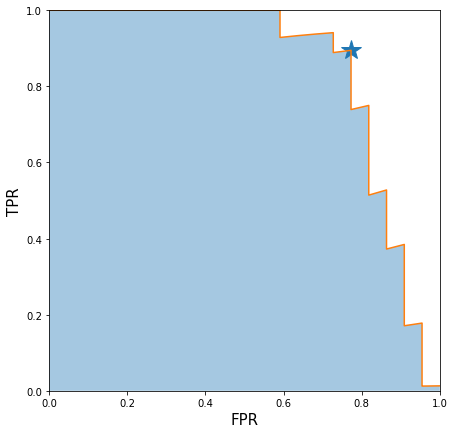

In [39]:
if __name__ == "__main__":
    # generate dataset
    X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                               n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)
    
    model = LogisticRegression(solver='lbfgs')
    model.fit(X_train, y_train)

    lr_probs = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)
    
    f1_scores = 2*recall*precision/(recall+precision)
    print('Best threshold: ', thresholds[np.argmax(f1_scores)])
    print('Best F1-Score: ', np.max(f1_scores))
    
    
    plt.figure(figsize=(7, 7))
    plt.fill_between(recall, precision, alpha=0.4)
    plt.plot(recall[np.argmax(f1_scores)], precision[np.argmax(f1_scores)], marker='*', markersize=20)
    plt.plot(recall, precision)
    plt.xlim(0, 1.0)
    plt.ylim(0, 1.0)
    plt.xlabel('FPR', fontsize=15)
    plt.ylabel('TPR', fontsize=15)
    plt.show()

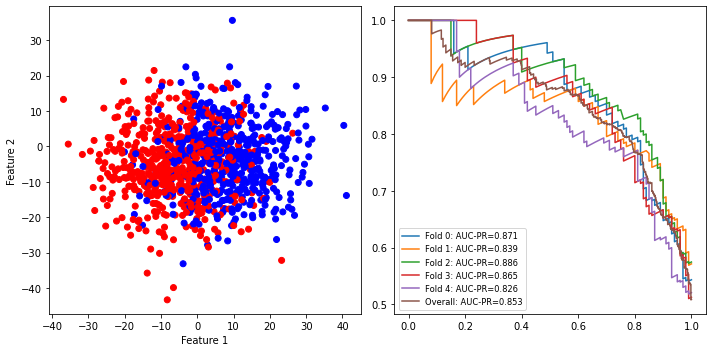

In [65]:
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
FOLDS = 5


X, y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=10.0,
    random_state=12345)

f, ax = plt.subplots(1, 2, figsize=(10, 5))
colors = ["blue", "red"]
ax[0].scatter(X[:,0], X[:,1], color = [colors[i] for i in y], label=[i for i in y])
ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")

kfold = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=2022)
clf =  SVC(kernel='linear', C=1.0, probability=True, random_state=2022)

y_preds = []
y_trues = []
for fold, (train_index, val_index) in enumerate(kfold.split(X, y)):
    #print(fold, len(train_index) + len(val_index))
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    clf.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_val)[:, 1] #keep only the prob of possitive class
    precision, recall, thresholds = precision_recall_curve(y_val, pred_proba)
    label = f"Fold {fold}: AUC-PR={round(auc(recall, precision),3)}"
    ax[1].plot(recall, precision, label=label)
    y_preds.append(pred_proba)
    y_trues.append(y_val)

y_preds = np.concatenate(y_preds)
y_trues = np.concatenate(y_trues)

precision, recall, thresholds = precision_recall_curve(y_trues, y_preds)
label = f"Overall: AUC-PR={round(auc(recall, precision),3)}"
ax[1].plot(recall, precision, label=label)

ax[1].legend(loc='lower left', fontsize='small')

f.tight_layout()
plt.show()


array([ 6,  8, 10])